<a href="https://colab.research.google.com/github/otokwala/Common-features/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

from keras.preprocessing import sequence
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/DF3.csv')
df.shape

(225711, 5)

In [5]:
df.head(3)

,V1,V2,V3,V4,Labels
0,-0.253908,0.088630,0.247481,-0.358719,0
1,-0.153446,0.676119,0.390619,-0.303980,0
2,-0.153728,0.676059,0.390683,-0.303741,0


In [ ]:
#df1=df.drop(['Unnamed: 4'], axis=1)
#df1.shape

(225711, 4)

In [16]:
labels=np.array(df[['Labels']])
#len(labels)

In [17]:
f=df.drop(['Labels'],axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split( f, labels, test_size=0.3, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((157997, 4), (67714, 4), (157997, 1), (67714, 1))

In [20]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history=model.fit(X_train, y_train, epochs=150, batch_size=256, validation_split=0.2).history

Epoch 1/150
494/494 [==============================] - 2s 2ms/step - loss: 0.3374 - accuracy: 0.9251 - val_loss: 0.1053 - val_accuracy: 0.9741
Epoch 2/150
494/494 [==============================] - 1s 1ms/step - loss: 0.0709 - accuracy: 0.9770 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 3/150
494/494 [==============================] - 1s 2ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 0.0345 - val_accuracy: 0.9873
Epoch 4/150
494/494 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9876 - val_loss: 0.0284 - val_accuracy: 0.9885
Epoch 5/150
494/494 [==============================] - 1s 1ms/step - loss: 0.0274 - accuracy: 0.9892 - val_loss: 0.0241 - val_accuracy: 0.9895
Epoch 6/150
494/494 [==============================] - 1s 1ms/step - loss: 0.0238 - accuracy: 0.9904 - val_loss: 0.0215 - val_accuracy: 0.9904
Epoch 7/150
494/494 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.9918 - val_loss: 0.0199 - val_accuracy: 0.9931

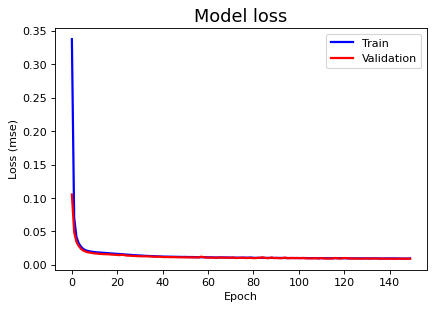

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mse)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Datasets/plot1.png')
plt.show()

In [53]:
y_pred = model.predict(X_test)

2117/2117 [==============================] - 2s 1ms/step


In [56]:
y_pred.shape, y_test.shape

((67714, 1), (67714, 1))

In [58]:
y_pred1=y_pred.flatten()

In [61]:
yp=np.argmax(y_pred, axis=1)

In [64]:
from sklearn.metrics import confusion_matrix

#Predict


#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, yp)
result

array([[29321,     0],
       [38393,     0]])

In [65]:
import seaborn as sns

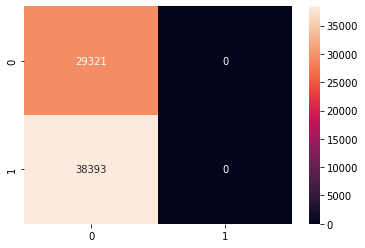

In [66]:
sns.heatmap(result,annot=True,fmt='')